<a href="https://colab.research.google.com/github/Spradhan22/Who-s-the-winner-/blob/main/221117_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

**Data Retreival**

In [4]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')
df.columns
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [5]:
df.describe(include='all')
df.get('Party').value_counts()

Party
BJP                         862
INC                         365
AITC                        130
AAP                          94
YSRCP                        86
DMK                          73
BJD                          65
SP                           62
CPI(M)                       43
RJD                          42
IND                          38
NCP                          34
AIADMK                       34
JD(U)                        32
SHS                          29
NPP                          20
JMM                          14
NDPP                          9
TDP                           8
JD(S)                         7
Sikkim Krantikari Morcha      5
CPI                           4
Tipra Motha Party             3
Name: count, dtype: int64

**PreProcessing**


Converting Assets and Liabilities to numerical values

In [6]:
Assets = df['Total Assets']
df["Assets_num"] = Assets.str.split(" ").str.get(0).astype(int) * (Assets.str.contains("Hun").astype(int)*1+ Assets.str.contains("Thou").astype(int)*1000 + Assets.str.contains("Lac").astype(int)*1000000 + Assets.str.contains("Crore").astype(int) * 1000000000)
Liabilities = df['Liabilities']
df["Liabilities_num"] = Liabilities.str.split(" ").str.get(0).astype(int) * (Liabilities.str.contains("Hun").astype(int)*1+Liabilities.str.contains("Thou").astype(int)*1000 + Liabilities.str.contains("Lac").astype(int)*1000000 + Liabilities.str.contains("Crore").astype(int) * 1000000000)
df.head()
Assets = df1['Total Assets']
df1["Assets_num"] = Assets.str.split(" ").str.get(0).astype(int) * (Assets.str.contains("Hun").astype(int)*1+Assets.str.contains("Thou").astype(int)*1000 + Assets.str.contains("Lac").astype(int)*1000000 + Assets.str.contains("Crore").astype(int) * 1000000000)
Liabilities = df1['Liabilities']
df1["Liabilities_num"] = Liabilities.str.split(" ").str.get(0).astype(int) * (Assets.str.contains("Hun").astype(int)*1+Liabilities.str.contains("Thou").astype(int)*1000 + Liabilities.str.contains("Lac").astype(int)*1000000 + Liabilities.str.contains("Crore").astype(int) * 1000000000)

We drop Candidates, Constituency ∇, and ID column since these labels are completely/almost unique for every data point.

In [7]:
df.drop(columns=['Candidate','Constituency ∇','ID'],inplace = True)
df.columns
df1.drop(columns=['Candidate','Constituency ∇','ID'],inplace = True)
df1.columns

Index(['Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state',
       'Assets_num', 'Liabilities_num'],
      dtype='object')

In [8]:
df.drop(columns=['Total Assets','Liabilities'],inplace = True)
df.columns
df1.drop(columns=['Total Assets','Liabilities'],inplace = True)

Now for categorical labels like State, Party we would like to do One hot encoding for the labels.

In [9]:
one_hot = pd.get_dummies(df['state'])
df = df.join(one_hot)
df.drop(columns=['state'],inplace=True)
one_hot = pd.get_dummies(df1['state'])
df1 = df1.join(one_hot)
df1.drop(columns=['state'],inplace=True)

In [10]:
one_hot = pd.get_dummies(df['Party'])
df = df.join(one_hot)
df.drop(columns=['Party'],inplace=True)
one_hot = pd.get_dummies(df1['Party'])
df1 = df1.join(one_hot)
df1.drop(columns=['Party'],inplace=True)

In [11]:
df.columns

Index(['Criminal Case', 'Education', 'Assets_num', 'Liabilities_num',
       'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH',
       'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'AAP', 'AIADMK', 'AITC', 'BJD', 'BJP', 'CPI', 'CPI(M)',
       'DMK', 'INC', 'IND', 'JD(S)', 'JD(U)', 'JMM', 'NCP', 'NDPP', 'NPP',
       'RJD', 'SHS', 'SP', 'Sikkim Krantikari Morcha', 'TDP',
       'Tipra Motha Party', 'YSRCP'],
      dtype='object')

In [12]:
df.Education.value_counts()
Education = df["Education"]

We encode Target label Education as numbers to visualize Correlation between labels


In [13]:
df['code'] = pd.factorize(df['Education'], sort=True)[0]

In [14]:
df.drop(columns = ['Education'],inplace = True)

**Correraltion between Columns**
Also note our target label is code

In [15]:
import seaborn as sns

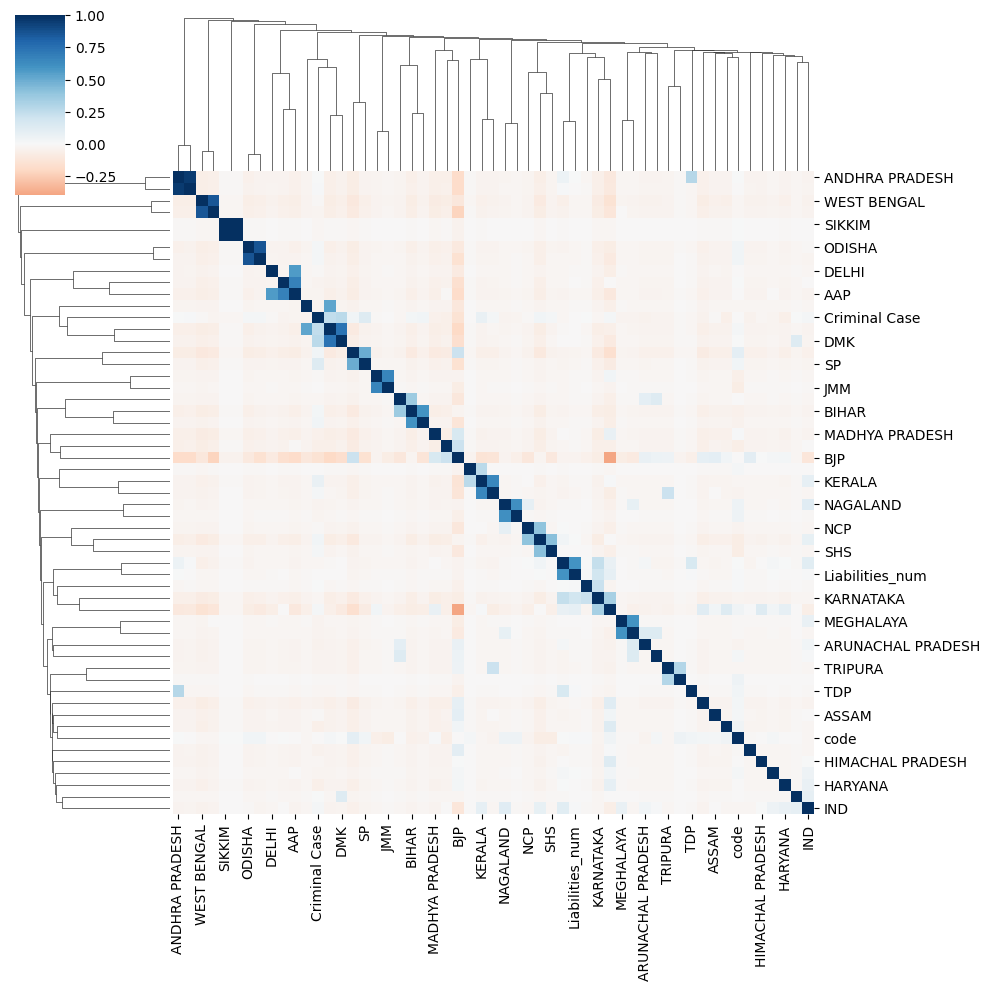

In [16]:
sns.clustermap(df.corr(), cmap='RdBu',center=0)

**Scaling Data**

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
y = df.code
X = df.drop(columns=['code'])
le = LabelEncoder()
y = Education
X_transformed = scaler.fit_transform(X)
X_test_transformed = scaler.fit_transform(df1)
X = X_transformed
X_test1 = X_test_transformed
y.value_counts()

Education
Graduate                 531
Post Graduate            432
12th Pass                349
Graduate Professional    339
10th Pass                227
8th Pass                  78
Doctorate                 52
Others                    28
Literate                  14
5th Pass                   9
Name: count, dtype: int64

**Model Training**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [19]:
# packages required for metrics
from sklearn.model_selection import cross_val_predict
import time, math
from sklearn.metrics import f1_score
cols_results=['family','model','classification_rate','runtime']
results = pd.DataFrame(columns=cols_results)
results

,family,model,classification_rate,runtime


# **KNN**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kVals = range(1,30)
knn_names = ['KNN-'+str(k) for k in kVals]
for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    time_start = time.time()
    y_pred = knn.predict(X_test)
    time_run = time.time()-time_start
    new_row = pd.DataFrame([['KNN',knn_names[k-1],f1_score(y_test,y_pred,average='micro'),time_run]],columns=cols_results)
    results = pd.concat([results, new_row], ignore_index=True)
results[results.family=='KNN']

,family,model,classification_rate,runtime
0,KNN,KNN-1,0.192557,0.389776
1,KNN,KNN-2,0.194175,0.319026
2,KNN,KNN-3,0.168285,0.263636
3,KNN,KNN-4,0.215210,0.224514
4,KNN,KNN-5,0.221683,0.049557
5,KNN,KNN-6,0.221683,0.154427
6,KNN,KNN-7,0.203883,0.178702
7,KNN,KNN-8,0.203883,0.051188
8,KNN,KNN-9,0.211974,0.060148
9,KNN,KNN-10,0.213592,0.157096


# **Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
import math
rVals = range(1,4)
maxd = range(2,3)
ind = -1
min_samp = [10*i for i in range(1,5)]
min_samp_leaf = [10*i for i in range(1,5)]
rf_names = ['RF-'+str(int(math.pow(10,r))) + '-' + str(int(math.pow(10,d))) + '-' + str(int(s1)) + '-' + str(int(s2)) + ' '   for r in rVals for d in maxd for s1 in min_samp_leaf for s2 in min_samp]
for r in rVals:
  for d in maxd:
    for s1 in min_samp:
      for s2 in min_samp_leaf:
        ind = ind + 1
        clf = RandomForestClassifier(n_estimators=int(math.pow(10,r)),max_depth=int(math.pow(10,d)),min_samples_split=s1,min_samples_leaf=s2,random_state=42)
        time_start = time.time()
        clf.fit(X_train,y_train)
        time_run = time.time()-time_start
        y_pred=clf.predict(X_test)
        results = pd.concat([results, pd.DataFrame([['RF',rf_names[ind],f1_score(y_test,y_pred,average='micro'),time_run]],columns=cols_results)],ignore_index=True)

results[results.family == 'RF']


,family,model,classification_rate,runtime
29,RF,RF-10-100-10-10,0.242718,0.026994
30,RF,RF-10-100-10-20,0.255663,0.022812
31,RF,RF-10-100-10-30,0.242718,0.021369
32,RF,RF-10-100-10-40,0.257282,0.021989
33,RF,RF-10-100-20-10,0.242718,0.023352
...,...,...,...,...
120,RF,RF-1000-100-30-40,0.257282,1.820341
121,RF,RF-1000-100-40-10,0.260518,2.131024
122,RF,RF-1000-100-40-20,0.255663,1.949400
123,RF,RF-1000-100-40-30,0.247573,2.116436


In [24]:
from sklearn import svm
clf = svm.SVC(kernel = 'sigmoid')
clf.fit(X_train, y_train)
time_run = time.time()-time_start
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,average = 'micro')

0.24271844660194175

In [32]:
knn_results = results[results.family == 'KNN']
rf_results = results[results.family == 'RF']
knn_results = knn_results.sort_values(by='classification_rate', ascending=False)
rf_results = rf_results.sort_values(by='classification_rate', ascending=False)
rf_results.to_latex(index = False)

'\\begin{tabular}{llrr}\n\\toprule\nfamily & model & classification_rate & runtime \\\\\n\\midrule\nRF & RF-1000-100-10-10  & 0.270227 & 2.616872 \\\\\nRF & RF-1000-100-20-10  & 0.270227 & 2.173240 \\\\\nRF & RF-1000-100-20-10  & 0.270227 & 2.152584 \\\\\nRF & RF-1000-100-10-10  & 0.270227 & 2.166511 \\\\\nRF & RF-1000-100-30-10  & 0.263754 & 2.124736 \\\\\nRF & RF-1000-100-30-10  & 0.263754 & 4.993485 \\\\\nRF & RF-100-100-40-10  & 0.262136 & 0.213711 \\\\\nRF & RF-100-100-40-10  & 0.262136 & 0.344057 \\\\\nRF & RF-100-100-20-10  & 0.260518 & 0.220281 \\\\\nRF & RF-1000-100-40-10  & 0.260518 & 2.131024 \\\\\nRF & RF-100-100-10-10  & 0.260518 & 0.351173 \\\\\nRF & RF-1000-100-40-10  & 0.260518 & 2.124356 \\\\\nRF & RF-100-100-20-10  & 0.260518 & 0.213521 \\\\\nRF & RF-100-100-10-10  & 0.260518 & 0.212474 \\\\\nRF & RF-1000-100-10-40  & 0.257282 & 1.828953 \\\\\nRF & RF-1000-100-20-40  & 0.257282 & 1.806584 \\\\\nRF & RF-1000-100-30-40  & 0.257282 & 2.371814 \\\\\nRF & RF-1000-100-40-40

In [ ]:
X.shape

In [ ]:
y

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)
# fitting the model for grid search
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

# Making a Prediction

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test1)
y_pred

array(['12th Pass', 'Post Graduate', '12th Pass', ..., 'Graduate',
       '12th Pass', 'Post Graduate'], dtype=object)

In [34]:
y_pred = y_pred.T
df2 = pd.DataFrame(y_pred, columns=["Education"])
df2.value_counts()
#y_pred.to_csv('sample_submission.csv', encoding='utf-8', index=True)

Education            
Graduate                 514
Post Graduate            360
12th Pass                257
Graduate Professional    166
10th Pass                 70
Doctorate                  5
8th Pass                   2
Name: count, dtype: int64

In [35]:
df2["ID"] = df2.index

In [36]:
df2.drop(columns = ['Education'] , inplace = True)
df2["Education"] = y_pred

In [37]:
df2.set_index('ID', inplace = True)

In [38]:
df2

,Education
ID,
0,12th Pass
1,Post Graduate
2,12th Pass
3,Post Graduate
4,Post Graduate
...,...
1369,Post Graduate
1370,Graduate Professional
1371,Graduate


In [39]:
df2.to_csv('sample_submission1.csv', encoding='utf-8', index=True)

**Side Missions**
# Data Analysis

Parties vs Criminal Records

In [40]:
df3 = pd.read_csv('train.csv')
df3.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


We want to Find percentage of Members in each party(%)

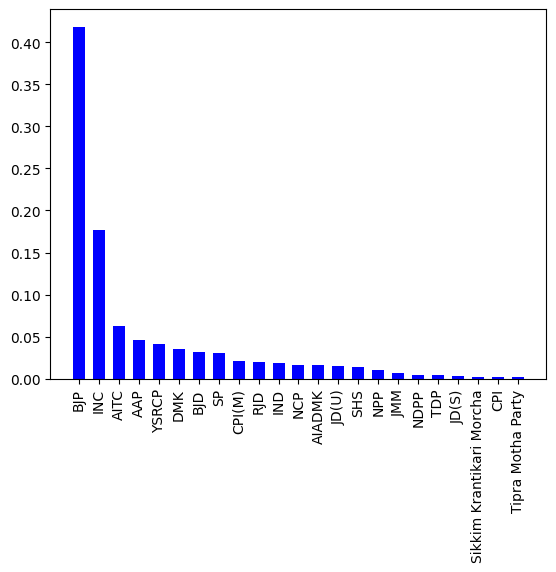

<Figure size 640x480 with 0 Axes>

In [55]:
party_counts = df3['Party'].value_counts()
x_label = party_counts.index
y_vals = party_counts
tot = y_vals.sum()
y_vals = y_vals / tot
fig, ax = plt.subplots()
bars = ax.bar(x_label , y_vals, color = 'blue',width=0.6)
plt.xticks(rotation=90)
plt.show()
plt.savefig('plt1.png')

BJP has 40 % of the candidates.

In order to find Criminal record associated with the party, we try to find the total criminal cases associated with the party members.

In [42]:
df3['Criminal Case'].describe()

count    2059.000000
mean        1.777562
std         4.762183
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        87.000000
Name: Criminal Case, dtype: float64

Cut off - 2 criminal cases


In [43]:
party_counts = df3['Party'].value_counts()
tot_criminal_cases = df3['Criminal Case'].sum()
filtered_df = df3[df3['Criminal Case'] > 2]
party_criminals = df3.groupby('Party')['Criminal Case'].sum()
Bigcriminals = filtered_df['Party'].value_counts()
Bigcriminals = Bigcriminals / party_criminals
Bigcriminals.fillna(0)

Party
AAP                         0.090090
AIADMK                      0.076923
AITC                        0.121212
BJD                         0.085106
BJP                         0.123353
CPI                         0.250000
CPI(M)                      0.165138
DMK                         0.078176
INC                         0.104762
IND                         0.061224
JD(S)                       0.133333
JD(U)                       0.121212
JMM                         0.208333
NCP                         0.130435
NDPP                        0.000000
NPP                         0.000000
RJD                         0.167939
SHS                         0.140845
SP                          0.066465
Sikkim Krantikari Morcha    0.000000
TDP                         0.000000
Tipra Motha Party           0.000000
YSRCP                       0.135593
dtype: float64

party_counts = df3['Party'].value_counts()
tot_criminal_cases = df3['Criminal Case'].sum()
tot_criminal_cases
party_criminals = df3.groupby('Party')['Criminal Case'].sum()
party_crimes = party_criminals / tot_criminal_cases

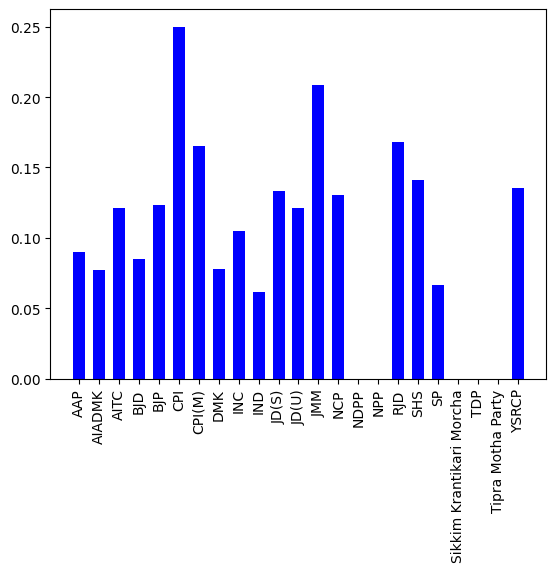

<Figure size 640x480 with 0 Axes>

In [52]:
x_labels = Bigcriminals.index
y_values = Bigcriminals
fig, ax = plt.subplots()
bars = ax.bar(x_labels , y_values, color = 'blue',width=0.6)
plt.xticks(rotation=90)
plt.show()
plt.savefig('plt2.png')

We observe that CPI and JMM have the highest percentage of criminals in their party

# Parties vs Wealthy_candidate

In [45]:
Assets = df3['Total Assets']
Liabilities = df3['Liabilities']
df3['Liab_num'] = Liabilities.str.split(" ").str.get(0).astype(int) * (Liabilities.str.contains("Hun").astype(int)+Liabilities.str.contains("Thou").astype(int)*10 + Liabilities.str.contains("Lac").astype(int)*1000 + Liabilities.str.contains("Crore").astype(int) * 100000)
df3['Assets_num'] = Assets.str.split(" ").str.get(0).astype(int) * (Assets.str.contains("Hun").astype(int)+Assets.str.contains("Thou").astype(int)*10 + Assets.str.contains("Lac").astype(int)*1000 + Assets.str.contains("Crore").astype(int) * 100000)
df3['Wealth'] = df3["Assets_num"] - df3["Liab_num"]

In [46]:
df3["Wealth"].describe()

count    2.059000e+03
mean     9.400845e+05
std      4.046811e+06
min     -7.100000e+06
25%      6.800000e+04
50%      2.000000e+05
75%      7.000000e+05
max      1.262000e+08
Name: Wealth, dtype: float64

**We assume candidate as wealthy if he has total assets more than 75% of the other candidates i.e has a wealth greater than or equal to 700K.**

In [57]:
Assets = df3['Wealth']
# Filter candidates with criminal cases more than 2
filtered_df = df3[df3['Wealth'] > 700000]
# Count the number of candidates from each party
wealthy = filtered_df['Party'].value_counts()
party_mems = df3['Party'].value_counts()
party_counts = wealthy / party_mems
party_counts.fillna(0)

Party
AAP                         0.117021
AIADMK                      0.117647
AITC                        0.053846
BJD                         0.153846
BJP                         0.228538
CPI                         0.000000
CPI(M)                      0.000000
DMK                         0.246575
INC                         0.336986
IND                         0.421053
JD(S)                       0.428571
JD(U)                       0.093750
JMM                         0.142857
NCP                         0.411765
NDPP                        0.333333
NPP                         0.300000
RJD                         0.142857
SHS                         0.344828
SP                          0.112903
Sikkim Krantikari Morcha    0.200000
TDP                         0.875000
Tipra Motha Party           0.000000
YSRCP                       0.383721
Name: count, dtype: float64

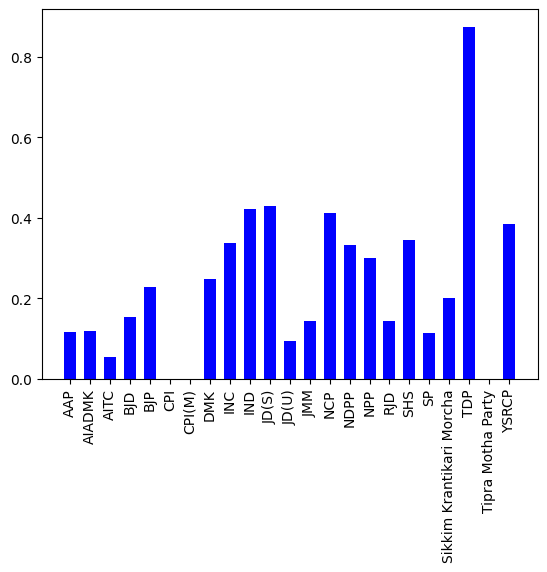

<Figure size 640x480 with 0 Axes>

In [58]:
x_labels = party_counts.index
y_values = party_counts
fig, ax = plt.subplots()
bars = ax.bar(x_labels , y_values, color = 'blue',width=0.6)
plt.xticks(rotation=90)
plt.show()
plt.savefig('plt3.png')

TDF has the highest percentage of wealthy candidates wealthiest candidates
